In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
base = pd.read_csv('petr4_treinamento.csv')
base.dropna(inplace=True)
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [3]:
base_treinamento = base[['Close']]
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_treinamento_normalizada

array([[0.76080559],
       [0.79567784],
       [0.79715132],
       ...,
       [0.58202356],
       [0.5844794 ],
       [0.5844794 ]])

In [4]:
base_treinamento_normalizada.shape

(1242, 1)

In [5]:
previsores = []
preco_real = []
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco_real = np.array(previsores), np.array(preco_real)
print(previsores)
print(preco_real)

[[0.76080559 0.79567784 0.79715132 ... 0.75392926 0.75491163 0.76375249]
 [0.79567784 0.79715132 0.77996075 ... 0.75491163 0.76375249 0.77062867]
 [0.79715132 0.77996075 0.75147351 ... 0.76375249 0.77062867 0.7858547 ]
 ...
 [0.46954816 0.47151279 0.47544207 ... 0.56728883 0.56728883 0.57809433]
 [0.47151279 0.47544207 0.47495091 ... 0.56728883 0.57809433 0.58202356]
 [0.47544207 0.47495091 0.47396859 ... 0.57809433 0.58202356 0.5844794 ]]
[0.77062867 0.7858547  0.78831045 ... 0.58202356 0.5844794  0.5844794 ]


In [6]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores[0]

array([[0.76080559],
       [0.79567784],
       [0.79715132],
       [0.77996075],
       [0.75147351],
       [0.76031438],
       [0.76768177],
       [0.77013751],
       [0.76227897],
       [0.76719061],
       [0.76817293],
       [0.76178781],
       [0.75540279],
       [0.74607071],
       [0.75540279],
       [0.75392926],
       [0.75687631],
       [0.74508849],
       [0.73231836],
       [0.68762287],
       [0.68172891],
       [0.70039291],
       [0.67779964],
       [0.68172891],
       [0.65815327],
       [0.65324168],
       [0.6650295 ],
       [0.66797641],
       [0.66159139],
       [0.6596267 ],
       [0.67288805],
       [0.68271123],
       [0.65913564],
       [0.64440082],
       [0.63605111],
       [0.62622798],
       [0.61591359],
       [0.61935165],
       [0.60952857],
       [0.62377213],
       [0.60412577],
       [0.60707267],
       [0.68025539],
       [0.72445981],
       [0.69597258],
       [0.72347744],
       [0.71414542],
       [0.714

In [8]:
regressor = Sequential()

regressor.add(LSTM(
    units=100,
    return_sequences=True,
    input_shape=(previsores.shape[1], 1)
))
regressor.add(Dropout(0.3))

regressor.add(LSTM(
    units=50,
    return_sequences=True
))
regressor.add(Dropout(0.3))

regressor.add(LSTM(
    units=50,
    return_sequences=True
))
regressor.add(Dropout(0.3))

regressor.add(LSTM(
    units=50
))
regressor.add(Dropout(0.3))

regressor.add(Dense(
    units=1,
    activation='linear'
))

regressor.compile(
    optimizer='rmsprop',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

regressor.fit(previsores, preco_real, epochs=100, batch_size=32)

Epoch 1/100
1152/1152 [==============================] - 6s 5ms/sample - loss: 0.0333 - mean_absolute_error: 0.1372
Epoch 2/100
1152/1152 [==============================] - 6s 5ms/sample - loss: 0.0145 - mean_absolute_error: 0.0934
Epoch 3/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0119 - mean_absolute_error: 0.0848
Epoch 4/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0114 - mean_absolute_error: 0.0816
Epoch 5/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0099 - mean_absolute_error: 0.0773
Epoch 6/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0082 - mean_absolute_error: 0.0688
Epoch 7/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0090 - mean_absolute_error: 0.0716
Epoch 8/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0071 - mean_absolute_error: 0.0646
Epoch 9/100
1152/1152 [==============================] - 7s 6ms/sample -

1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0019 - mean_absolute_error: 0.0326
Epoch 72/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0017 - mean_absolute_error: 0.0315
Epoch 73/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0016 - mean_absolute_error: 0.0307
Epoch 74/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0018 - mean_absolute_error: 0.0321
Epoch 75/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0017 - mean_absolute_error: 0.0315
Epoch 76/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0017 - mean_absolute_error: 0.0307
Epoch 77/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0017 - mean_absolute_error: 0.0313
Epoch 78/100
1152/1152 [==============================] - 7s 6ms/sample - loss: 0.0017 - mean_absolute_error: 0.0308
Epoch 79/100
1152/1152 [==============================] - 7s 6ms/sample - los

In [9]:
base_teste = pd.read_csv('petr4_teste.csv')
preco_real_teste = base_teste['Close'].values
base_completa = pd.concat((base['Close'], base_teste['Close']), axis=0)
base_completa

0     19.690001
1     20.400000
2     20.430000
3     20.080000
4     19.500000
        ...    
17    19.340000
18    19.930000
19    19.850000
20    19.490000
21    19.700001
Name: Close, Length: 1264, dtype: float64

In [13]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)
len(entradas)

/home/cassius/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


112

In [16]:
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
X_teste.shape

(22, 90, 1)

In [17]:
previsoes = regressor.predict(X_teste)
previsoes

array([[0.57947   ],
       [0.59649855],
       [0.60665005],
       [0.6073431 ],
       [0.6112249 ],
       [0.6209606 ],
       [0.6229713 ],
       [0.61386245],
       [0.62920725],
       [0.6365826 ],
       [0.63663304],
       [0.6479838 ],
       [0.6788642 ],
       [0.6771927 ],
       [0.6746503 ],
       [0.68586457],
       [0.68024933],
       [0.7208485 ],
       [0.72845566],
       [0.7465112 ],
       [0.7477451 ],
       [0.732852  ]], dtype=float32)

In [18]:
previsoes = normalizador.inverse_transform(previsoes)
previsoes

array([[15.998008],
       [16.34471 ],
       [16.551395],
       [16.565504],
       [16.644539],
       [16.842756],
       [16.883696],
       [16.698238],
       [17.010658],
       [17.160822],
       [17.161848],
       [17.39295 ],
       [18.021673],
       [17.987642],
       [17.935879],
       [18.164202],
       [18.049875],
       [18.876474],
       [19.031357],
       [19.398968],
       [19.42409 ],
       [19.120865]], dtype=float32)

In [19]:
previsoes.shape

(22, 1)

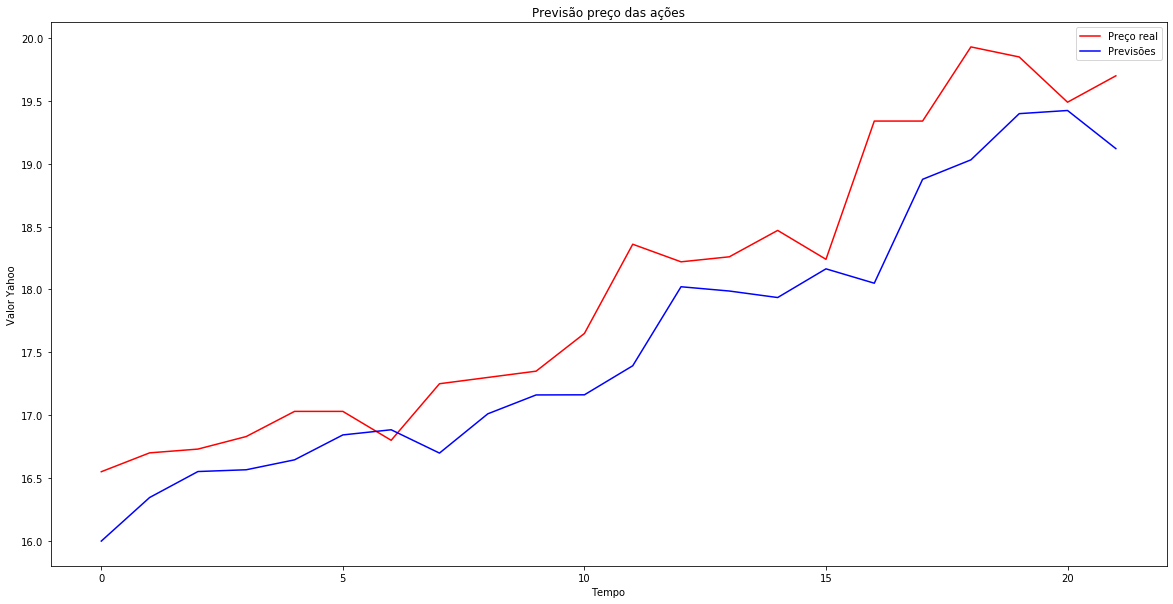

In [23]:
plt.figure(figsize=(20,10))
plt.plot(preco_real_teste, color='red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()